In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df_business = pd.read_csv('raw/All_CO_businesses_geocoded.csv')
df_college_loc = pd.read_csv('raw/co_college_locations.csv')
df_degrees = pd.read_csv('raw/degreesAwarded.csv')
df_zip_code = pd.read_csv('raw/zip_code_database.csv')
df_gdp_boulder = pd.read_csv('raw/RPCGDP_Boulder-CO.csv')
df_gdp_co_springs = pd.read_csv('raw/RPCGDP_Colorado-Springs-CO.csv')
df_gdp_denver = pd.read_csv('raw/RPCGDP_Denver-Aurora-Lakewood-CO.csv')
df_gdp_fort_col = pd.read_csv('raw/RPCGDP_Fort-Collins-CO.csv')
df_gdp_grand_junc = pd.read_csv('raw/RPCGDP_Grand-Junction-CO.csv')
df_gdp_greeley = pd.read_csv('raw/RPCGDP_Greeley-CO.csv')
df_gdp_pueblo = pd.read_csv('raw/RPCGDP_Pueblo-CO.csv')

In [3]:
'''First Clean CO business dataset'''
df_business.head(50)

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,principalcountry,mailingaddress1,mailingaddress2,...,agentprincipalstate,agentprincipalzipcode,agentprincipalcountry,agentmailingaddress1,agentmailingaddress2,agentmailingcity,agentmailingstate,agentmailingzipcode,agentmailingcountry,entityformdate
0,20191314214,IQ Enterprises LLC,4950 S Yosemite St,F2-128,Greenwood Village,CO,80111,US,NaN,NaN,...,CO,80111,US,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019
1,20191314208,Rebel Friends LLC,3821 Cook St.,NaN,Denver,CO,80205,US,NaN,NaN,...,CO,80903,US,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019
2,20191314215,Miller & Cole LLC,31 Breamore Ct.,NaN,Castle Pines,CO,80108,US,NaN,NaN,...,CO,80903,US,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019
3,20191314217,Blue Priority One Security L.L.C.,19672 E. 55th Pl.,NaN,Denver,CO,80249,US,NaN,NaN,...,CO,80249,US,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019
4,20191314220,IQ Motors Limited,4950 S Yosemite St,F2-128,Greenwood Village,CO,80111,US,NaN,NaN,...,CO,80111,US,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019
5,20191314200,"GFL LLC, Colorado Authority Relinquished April...",P. O. Box 229 c/o Nangulu Primary S,"Tororo Highway Road, Ndaiga",Busia,OT,10,UG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019
6,20191314223,TUBNVOOT LTD.,9888 W Belleview Ave Ste 2142,NaN,Denver,CO,80123,US,NaN,NaN,...,CO,80123,US,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019
7,20191314203,GFL LLC,PO BOX 229,c/o Nangulu P/S,Ndaiga,OT,Tororo H/R,UG,NaN,NaN,...,CO,80302,US,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019
8,20191314212,Chapman LLC,"1420 8th St., Apt. 1107",NaN,Golden,CO,80401,US,NaN,NaN,...,CO,80903,US,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019
9,20191314224,"GERSON & GERSON,INC.",12427 E Alaska Pl,NaN,Aurora,CO,80012,US,NaN,NaN,...,CO,80012,US,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2019


In [4]:
df_business.tail()

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,principalcountry,mailingaddress1,mailingaddress2,...,agentprincipalstate,agentprincipalzipcode,agentprincipalcountry,agentmailingaddress1,agentmailingaddress2,agentmailingcity,agentmailingstate,agentmailingzipcode,agentmailingcountry,entityformdate
1848352,19871214372,"THE FIRST UNITED METHODIST CHURCH OF PUEBLO, C...",310 WEST 11TH STREET,NaN,Pueblo,CO,81003,US,310 W 11th St,NaN,...,CO,81001,US,310 W 11th St,NaN,PUEBLO,CO,81003,US,04/23/1870
1848353,19871000184,"NI WOT DITCH COMPANY, Dissolved February 1, 1866",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02/01/1866
1848354,19871000162,BIG THOMPSON AND PLATTE RIVER DITCH COMPANY,23064 WCR 21 3/4,NaN,Milliken,CO,80543,US,P.O. Box 181,NaN,...,CO,80543,US,P.O. Box 181,NaN,Milliken,CO,80543,US,11/30/1865
1848355,19871000125,EAST BOULDER DITCH COMPANY,1800 Larimer Street,Suite 1100,Denver,CO,80202,US,414 Nicollet Mall,401-9,...,CO,80120,US,NaN,NaN,NaN,NaN,NaN,NaN,06/30/1865
1848356,19871025787,COLORADO SEMINARY,2199 S University Blvd.,NaN,Denver,CO,80208,US,NaN,NaN,...,CO,80208,US,NaN,NaN,NaN,NaN,NaN,NaN,03/05/1864


In [5]:
df_business.shape

(1848357, 35)

In [6]:
df_business.describe()

,entityid
count,1.848357e+06
mean,2.008011e+10
std,8.212295e+07
min,1.886122e+10
25%,2.003114e+10
50%,2.009150e+10
75%,2.015119e+10
max,2.019131e+10


In [7]:
df_business.dtypes

entityid                   int64
entityname                object
principaladdress1         object
principaladdress2         object
principalcity             object
principalstate            object
principalzipcode          object
principalcountry          object
mailingaddress1           object
mailingaddress2           object
mailingcity               object
mailingstate              object
mailingzipcode            object
mailingcountry            object
entitystatus              object
jurisdictonofformation    object
entitytype                object
agentfirstname            object
agentmiddlename           object
agentlastname             object
agentsuffix               object
agentorganizationname     object
agentprincipaladdress1    object
agentprincipaladdress2    object
agentprincipalcity        object
agentprincipalstate       object
agentprincipalzipcode     object
agentprincipalcountry     object
agentmailingaddress1      object
agentmailingaddress2      object
agentmaili

In [8]:
df_business.isnull().sum()

entityid                        0
entityname                      1
principaladdress1           84527
principaladdress2         1536230
principalcity               84686
principalstate              84799
principalzipcode            85191
principalcountry            84840
mailingaddress1           1274345
mailingaddress2           1768137
mailingcity               1274320
mailingstate              1274305
mailingzipcode            1274349
mailingcountry            1265099
entitystatus                    0
jurisdictonofformation          4
entitytype                   1385
agentfirstname             443568
agentmiddlename           1005105
agentlastname              443566
agentsuffix               1798069
agentorganizationname     1535601
agentprincipaladdress1     130853
agentprincipaladdress2    1560682
agentprincipalcity         130841
agentprincipalstate        130778
agentprincipalzipcode      130836
agentprincipalcountry      130778
agentmailingaddress1      1378959
agentmailingad

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


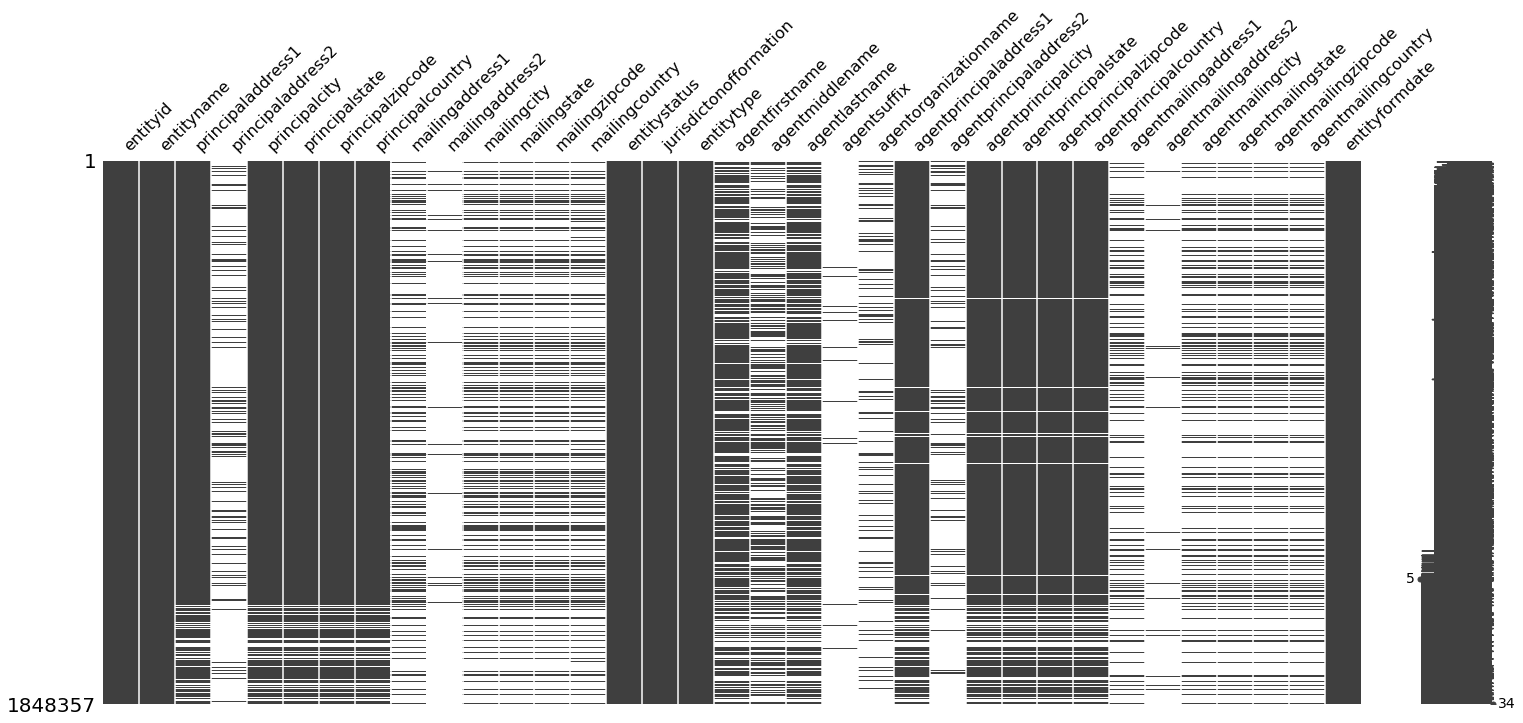

In [9]:
msno.matrix(df_business)
plt.tight_layout()
plt.savefig('../images/all_bus_msno.png')
plt.show()

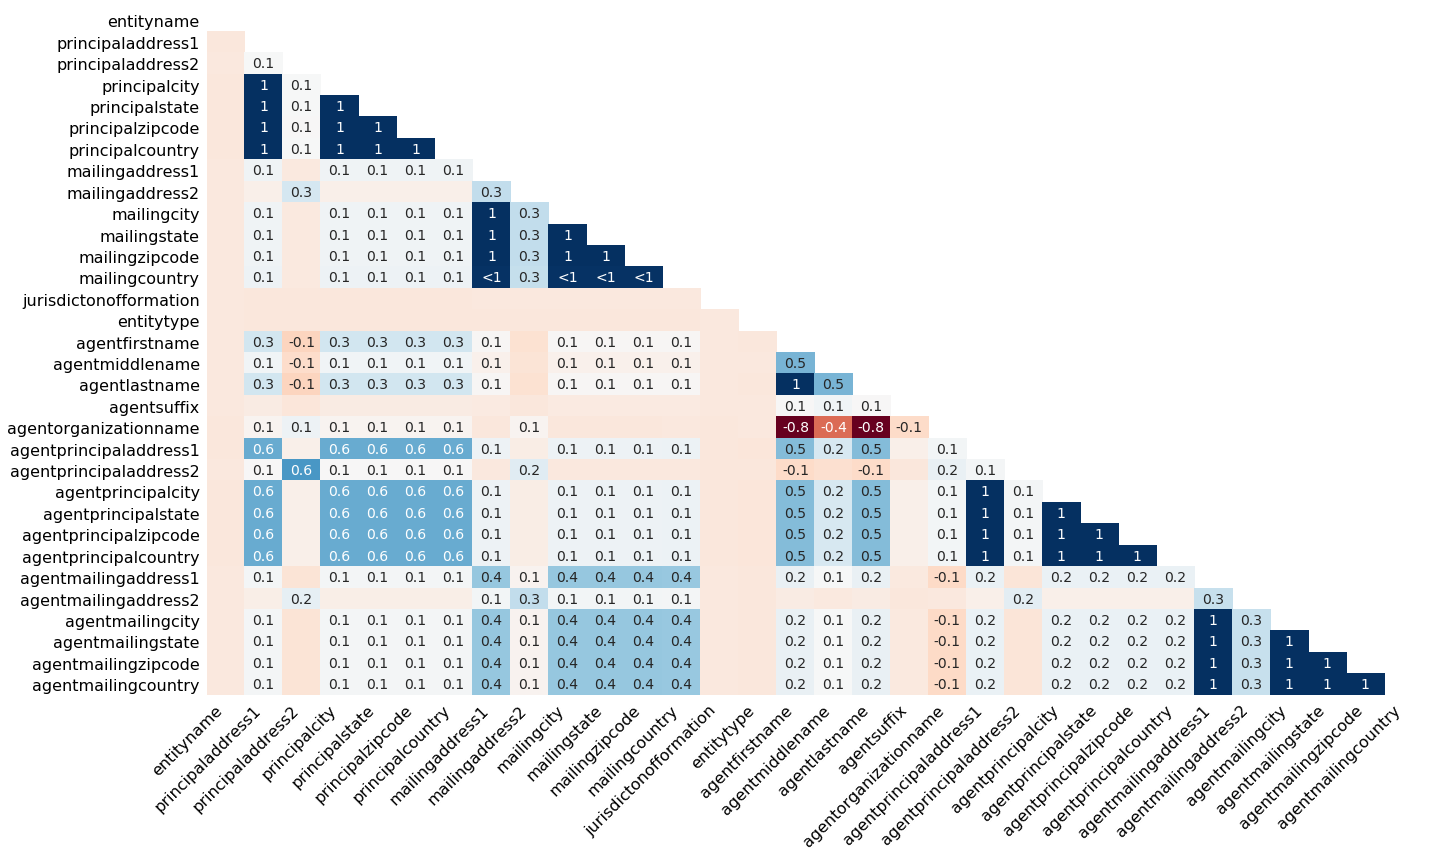

In [10]:
msno.heatmap(df_business)
plt.tight_layout()
plt.savefig('../images/all_bus_heatmap.png')
plt.show()

In [11]:
df_business.columns

Index(['entityid', 'entityname', 'principaladdress1', 'principaladdress2',
       'principalcity', 'principalstate', 'principalzipcode',
       'principalcountry', 'mailingaddress1', 'mailingaddress2', 'mailingcity',
       'mailingstate', 'mailingzipcode', 'mailingcountry', 'entitystatus',
       'jurisdictonofformation', 'entitytype', 'agentfirstname',
       'agentmiddlename', 'agentlastname', 'agentsuffix',
       'agentorganizationname', 'agentprincipaladdress1',
       'agentprincipaladdress2', 'agentprincipalcity', 'agentprincipalstate',
       'agentprincipalzipcode', 'agentprincipalcountry',
       'agentmailingaddress1', 'agentmailingaddress2', 'agentmailingcity',
       'agentmailingstate', 'agentmailingzipcode', 'agentmailingcountry',
       'entityformdate'],
      dtype='object')

In [12]:
df_bus = df_business.copy()
to_drop = ['principalcountry', 'mailingaddress1', 'mailingaddress2', 'mailingcity',
       'mailingstate', 'mailingzipcode', 'mailingcountry', 'agentfirstname',
       'agentmiddlename', 'agentlastname', 'agentsuffix',
       'agentorganizationname','agentprincipaladdress2', 'agentprincipalcity', 'agentprincipalstate',
       'agentprincipalzipcode', 'agentprincipalcountry',
       'agentmailingaddress1', 'agentmailingaddress2', 'agentmailingcity',
       'agentmailingstate', 'agentmailingzipcode', 'agentmailingcountry']
df_bus.drop(to_drop, inplace=True, axis=1)

In [13]:
df_bus.head()

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
0,20191314214,IQ Enterprises LLC,4950 S Yosemite St,F2-128,Greenwood Village,CO,80111,Good Standing,CO,Limited Liability Company,4950 S Yosemite St,04/11/2019
1,20191314208,Rebel Friends LLC,3821 Cook St.,NaN,Denver,CO,80205,Good Standing,CO,Limited Liability Company,"121 S. Tejon Street, Suite 900",04/11/2019
2,20191314215,Miller & Cole LLC,31 Breamore Ct.,NaN,Castle Pines,CO,80108,Good Standing,CO,Limited Liability Company,"121 S. Tejon Street, Suite 900",04/11/2019
3,20191314217,Blue Priority One Security L.L.C.,19672 E. 55th Pl.,NaN,Denver,CO,80249,Good Standing,CO,Limited Liability Company,19672 E. 55th Pl.,04/11/2019
4,20191314220,IQ Motors Limited,4950 S Yosemite St,F2-128,Greenwood Village,CO,80111,Good Standing,CO,Limited Liability Company,4950 S Yosemite St,04/11/2019


In [14]:
df_bus['entityformdate'] = pd.to_datetime(df_bus['entityformdate'])
df_bus.dtypes

entityid                           int64
entityname                        object
principaladdress1                 object
principaladdress2                 object
principalcity                     object
principalstate                    object
principalzipcode                  object
entitystatus                      object
jurisdictonofformation            object
entitytype                        object
agentprincipaladdress1            object
entityformdate            datetime64[ns]
dtype: object

In [15]:
df_bus.head()

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
0,20191314214,IQ Enterprises LLC,4950 S Yosemite St,F2-128,Greenwood Village,CO,80111,Good Standing,CO,Limited Liability Company,4950 S Yosemite St,2019-04-11
1,20191314208,Rebel Friends LLC,3821 Cook St.,NaN,Denver,CO,80205,Good Standing,CO,Limited Liability Company,"121 S. Tejon Street, Suite 900",2019-04-11
2,20191314215,Miller & Cole LLC,31 Breamore Ct.,NaN,Castle Pines,CO,80108,Good Standing,CO,Limited Liability Company,"121 S. Tejon Street, Suite 900",2019-04-11
3,20191314217,Blue Priority One Security L.L.C.,19672 E. 55th Pl.,NaN,Denver,CO,80249,Good Standing,CO,Limited Liability Company,19672 E. 55th Pl.,2019-04-11
4,20191314220,IQ Motors Limited,4950 S Yosemite St,F2-128,Greenwood Village,CO,80111,Good Standing,CO,Limited Liability Company,4950 S Yosemite St,2019-04-11


In [16]:
mask = (df_bus['entityformdate'] >= '2001-01-01') & (df_bus['entityformdate'] <= '2017-12-31')

In [17]:
df_bus.loc[mask]

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
163837,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,NaN,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
163838,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,NaN,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31
163839,20171976820,CJB Events and Gifts,15860 W 66th Place,NaN,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31
163840,20171975638,"The Mind Guy, LLC",1228 15th Street,Suite 308,Denver,CO,80202,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31
163841,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,NaN,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31
163842,20171975216,"Farmhouse Roost LLC, Dissolved March 3, 2018",11908 Bonifay Loop,NaN,Peyton,CO,80831,Voluntarily Dissolved,CO,Limited Liability Company,11908 Bonifay Loop,2017-12-31
163843,20171976161,10537 W 107TH WESTMINSTER CO 80021 LLC,1006 E ROGGEN WAY,NaN,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
163844,20171976432,TOPSOUND SYSTEMS INC.,1180 N Town Center Dr Ste 100,NaN,Las Vegas,NV,89144,Good Standing,CO,Corporation,2236 E 109th Dr,2017-12-31
163845,20171976139,311 CATTAIL CT LONGMONT CO 80501 LLC,1006 E ROGGEN WAY,NaN,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
163846,20171976087,492 E Highline Circle LLC,5191 Ward Road,Unit 4,Wheat Ridge,CO,80033,Good Standing,CO,Limited Liability Company,5191 Ward Road,2017-12-31


In [18]:
df_bus = df_bus[mask]

In [19]:
df_bus.head()

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
163837,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,NaN,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
163838,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,NaN,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31
163839,20171976820,CJB Events and Gifts,15860 W 66th Place,NaN,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31
163840,20171975638,"The Mind Guy, LLC",1228 15th Street,Suite 308,Denver,CO,80202,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31
163841,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,NaN,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31


In [20]:
df_bus.tail()

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
1501362,20001247346,"ABC DRAIN & SEWER CLEANING, INC., Delinquent J...",2000 W 92ND AVE STE 609,NaN,Denver,CO,80260,Delinquent,CO,Corporation,2000 W 92ND AVE STE 609,2001-01-01
1501363,20001246744,"PROFESSIONAL TOUCH OF NW COLORADO, LLC., Delin...",112 E MAIN ST,NaN,Rangely,CO,81648,Delinquent,CO,Limited Liability Company,112 E MAIN ST,2001-01-01
1501364,20001246668,"MADDMAXX ENTERTAINMENT & PROMOTIONS, INC., Dis...",PO BOX 270513,NaN,Fort Collins,CO,80527,Administratively Dissolved,CO,Corporation,NaN,2001-01-01
1501365,20001252334,"MT. HARVARD MORTGAGE, INC., Dissolved June 30,...",419 HWY 24 S,NaN,Buena Vista,CO,81211,Administratively Dissolved,CO,Corporation,419 HWY 24 S,2001-01-01
1501366,20001246449,"SEPTIC KING, LLC, Delinquent June 1, 2010",81 Arapahoe Trail,NaN,Woodland Park,CO,80863,Delinquent,CO,Limited Liability Company,81 Arapahoe Trail,2001-01-01


In [21]:
df_bus = df_bus.reset_index(drop=True)

In [22]:
df_bus.head(100)

,entityid,entityname,principaladdress1,principaladdress2,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
0,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,NaN,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
1,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,NaN,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31
2,20171976820,CJB Events and Gifts,15860 W 66th Place,NaN,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31
3,20171975638,"The Mind Guy, LLC",1228 15th Street,Suite 308,Denver,CO,80202,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31
4,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,NaN,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31
5,20171975216,"Farmhouse Roost LLC, Dissolved March 3, 2018",11908 Bonifay Loop,NaN,Peyton,CO,80831,Voluntarily Dissolved,CO,Limited Liability Company,11908 Bonifay Loop,2017-12-31
6,20171976161,10537 W 107TH WESTMINSTER CO 80021 LLC,1006 E ROGGEN WAY,NaN,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
7,20171976432,TOPSOUND SYSTEMS INC.,1180 N Town Center Dr Ste 100,NaN,Las Vegas,NV,89144,Good Standing,CO,Corporation,2236 E 109th Dr,2017-12-31
8,20171976139,311 CATTAIL CT LONGMONT CO 80501 LLC,1006 E ROGGEN WAY,NaN,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
9,20171976087,492 E Highline Circle LLC,5191 Ward Road,Unit 4,Wheat Ridge,CO,80033,Good Standing,CO,Limited Liability Company,5191 Ward Road,2017-12-31


In [23]:
df_bus.shape

(1337530, 12)

In [24]:
df_bus.isnull().sum()

entityid                        0
entityname                      1
principaladdress1           12972
principaladdress2         1093481
principalcity               12956
principalstate              12961
principalzipcode            13219
entitystatus                    0
jurisdictonofformation          4
entitytype                    969
agentprincipaladdress1      34181
entityformdate                  0
dtype: int64

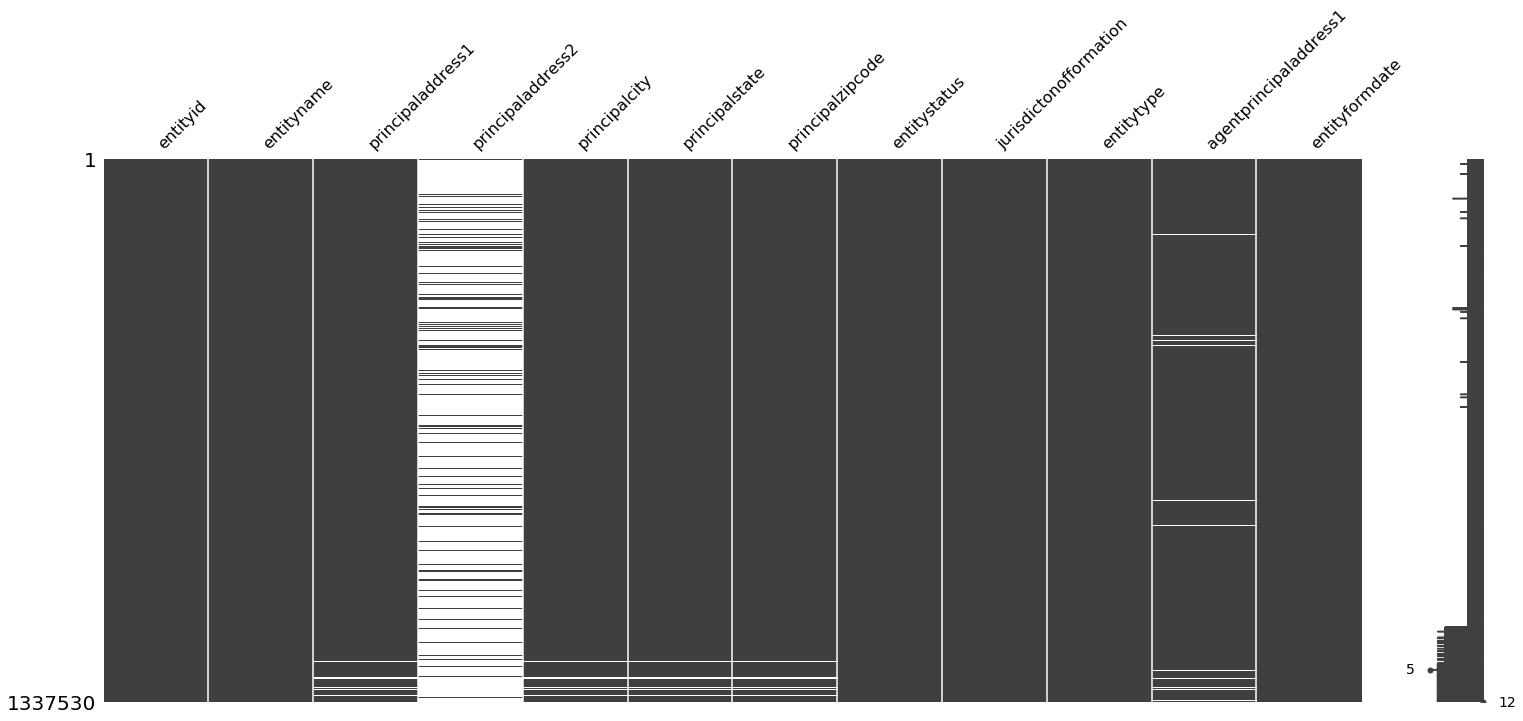

In [25]:
msno.matrix(df_bus)

In [26]:
df_bus.drop('principaladdress2', inplace=True, axis=1)

In [27]:
df_bus.isnull().sum()

entityid                      0
entityname                    1
principaladdress1         12972
principalcity             12956
principalstate            12961
principalzipcode          13219
entitystatus                  0
jurisdictonofformation        4
entitytype                  969
agentprincipaladdress1    34181
entityformdate                0
dtype: int64

In [28]:
df_bus = df_bus.dropna()

In [29]:
df_bus.isnull().sum()

entityid                  0
entityname                0
principaladdress1         0
principalcity             0
principalstate            0
principalzipcode          0
entitystatus              0
jurisdictonofformation    0
entitytype                0
agentprincipaladdress1    0
entityformdate            0
dtype: int64

In [30]:
df_bus.shape

(1296819, 11)

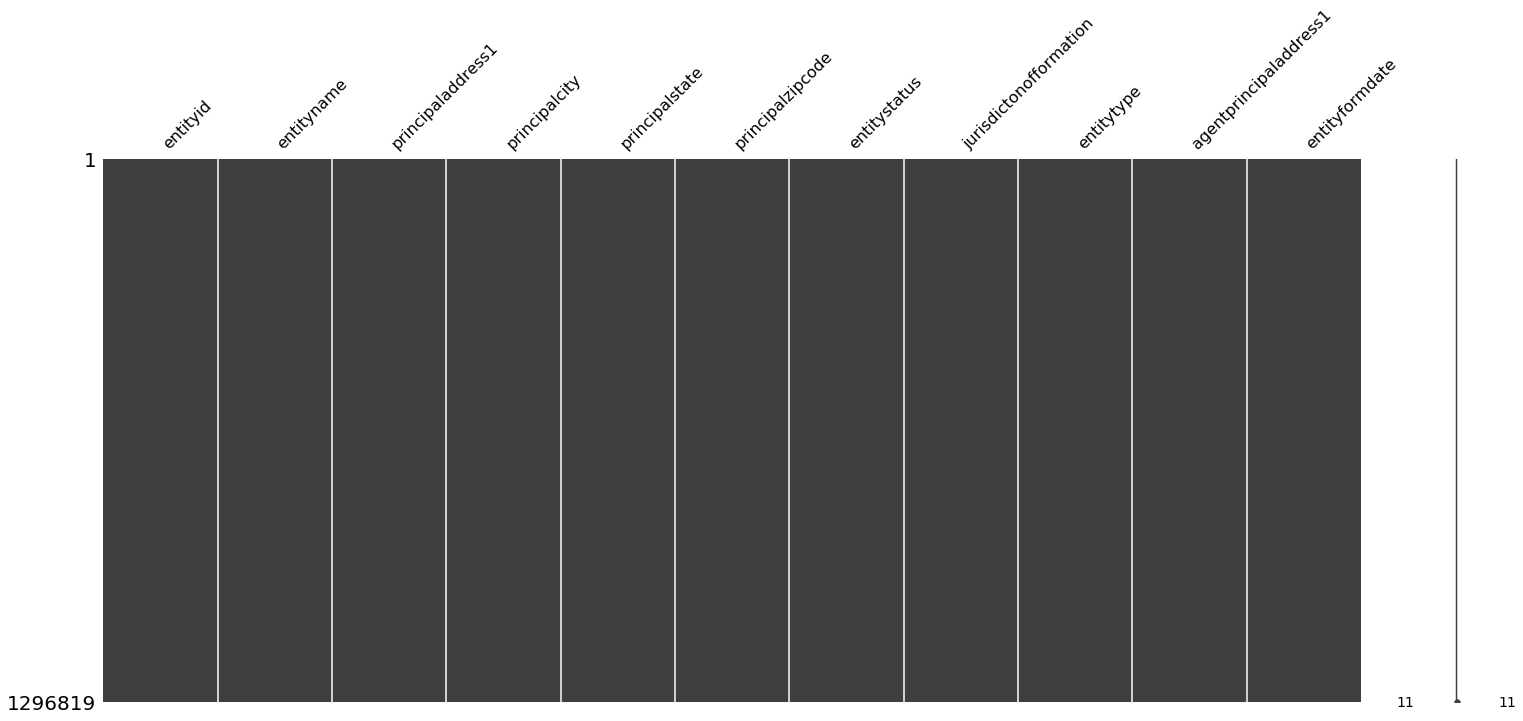

In [31]:
msno.matrix(df_bus)

In [32]:
df_bus['principalstate'].nunique()

70

In [33]:
df_bus['principalstate'].unique()

array(['CO', 'NV', 'GA', 'CA', 'MS', 'UT', 'WI', 'NY', 'MT', 'TX', 'AK',
       'NE', 'MA', 'IL', 'FL', 'PA', 'OH', 'NC', 'AZ', 'WY', 'OK', 'NH',
       'DE', 'RI', 'IA', 'SC', 'MN', 'VA', 'OR', 'KS', 'TN', 'MO', 'AL',
       'NM', 'MD', 'CT', 'IN', 'LA', 'SD', 'ID', 'OT', 'WA', 'NJ', 'MI',
       'VT', 'PR', 'KY', 'DC', 'HI', 'QC', 'BC', 'ND', 'ME', 'ON', 'AR',
       'MB', 'AB', 'WV', 'SK', 'VI', 'MP', 'NB', 'AA', 'NS', 'AP', 'AE',
       'PE', 'FM', 'FC', 'NL'], dtype=object)

In [34]:
print('Number of unique jurisdictions of formation: ', df_bus['jurisdictonofformation'].nunique())
print('Unique jurisdictions of formation: ', df_bus['jurisdictonofformation'].unique())

Number of unique jurisdictions of formation:  1086
Unique jurisdictions of formation:  ['CO' 'DE' 'CA' ... 'St Louis, MO' 'Cayman Island'
 '7-90-301 et seq and 7-122-01']


In [35]:
mask_state = (df_bus['principalstate'] == 'CO') & (df_bus['jurisdictonofformation'] == 'CO')

In [36]:
df_bus_co = df_bus[mask_state]

In [37]:
df_bus_co.sample(100)

,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
1238413,20031022667,SOLUTIONS FOR CONFLICT RESOLUTION IN HEALTHCAR...,5738 S QUINTERO CIR,Centennial,CO,80015,Delinquent,CO,Limited Liability Company,3025 S PARKER RD STE 200,2003-01-21
1274657,20021117694,"MBJ PROPERTIES, LLC",2 GARDEN CENTER,Broomfield,CO,80020,Good Standing,CO,Limited Liability Company,2 GARDEN CENTER,2002-05-03
1296938,20011225809,"DELFISOLUTIONS, INC., Dissolved April 30, 2005",1660 S ALBION ST STE 309,Denver,CO,80222,Administratively Dissolved,CO,Corporation,1660 SOUTH ALBION STE 1100,2001-11-28
553445,20121316775,"The Flooring Experience, LLC, Delinquent Novem...",21532 E 41st Pl,Denver,CO,80249,Delinquent,CO,Limited Liability Company,21532 E 41st Pl,2012-06-08
598753,20111641156,AM PM Gas & Convenience,2105 Federal BLVD,Denver,CO,80211,Good Standing,CO,Corporation,2105 Federal blvd,2011-11-21
100853,20171113065,"Patch Master, LLC",510 Morning Glory Ln,Grand Junction,CO,81504,Good Standing,CO,Limited Liability Company,101 S 3rd St Ste 350,2017-02-09
1135873,20041325784,"Hard Boiled Marketing, Delinquent November 1, ...",30 Abrook Ct.,Colorado Springs,CO,80906,Delinquent,CO,Corporation,30 Abrook Ct.,2004-09-30
480926,20131233011,"Peak Painting Company, LLC, Delinquent Septemb...",1048 Palacio View Apt. 106,Colorado Springs,CO,80910,Delinquent,CO,Limited Liability Company,1048 Palacio View Apt. 106,2013-04-15
1102414,20051087237,"Wastewater Treatment Associates, Inc., Dissolv...",10475 Irma Drive Unit 7,Northglenn,CO,80233,Voluntarily Dissolved,CO,Corporation,8073 Orlando Way,2005-02-28
518014,20121661375,"Denver Collaborative, LLC",3848 Zuni St,Denver,CO,80211,Good Standing,CO,Limited Liability Company,3848 Zuni St,2012-11-29


In [38]:
df_bus_co.shape

(1147849, 11)

In [39]:
mask_reg_agent = (df_bus['principaladdress1'] == df_bus['agentprincipaladdress1'])

In [40]:
df_reg_agent = df_bus[mask_reg_agent]

In [41]:
len(df_reg_agent)

810756

In [42]:
a = len(df_reg_agent)
b = len(df_bus)
c = b - a 
print('% of companies that use Reg Agent Address: ', a/b)
print('Number of companies that use Reg Agent Address: ', a)
print('% of companies that use other address: ', c/b)
print('Number of companies that use other address: ', c) 
'''Due to so many companies using the registered agent address as its address I am going to assume all of these 
companies are started in Colorado and will ignore this for now'''
#Assumption#

% of companies that use Reg Agent Address:  0.6251882490925873
Number of companies that use Reg Agent Address:  810756
% of companies that use other address:  0.3748117509074127
Number of companies that use other address:  486063


'Due to so many companies using the registered agent address as its address I am going to assume all of these \ncompanies are started in Colorado and will ignore this for now'

In [43]:
df_bus_co = df_bus_co.reset_index(drop=True)

In [44]:
df_bus_co

,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
0,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
1,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31
2,20171976820,CJB Events and Gifts,15860 W 66th Place,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31
3,20171975638,"The Mind Guy, LLC",1228 15th Street,Denver,CO,80202,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31
4,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31
5,20171975216,"Farmhouse Roost LLC, Dissolved March 3, 2018",11908 Bonifay Loop,Peyton,CO,80831,Voluntarily Dissolved,CO,Limited Liability Company,11908 Bonifay Loop,2017-12-31
6,20171976161,10537 W 107TH WESTMINSTER CO 80021 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
7,20171976139,311 CATTAIL CT LONGMONT CO 80501 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
8,20171976087,492 E Highline Circle LLC,5191 Ward Road,Wheat Ridge,CO,80033,Good Standing,CO,Limited Liability Company,5191 Ward Road,2017-12-31
9,20171976126,1369 DOVER ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31


In [45]:
df_bus_co.isnull().sum()

entityid                  0
entityname                0
principaladdress1         0
principalcity             0
principalstate            0
principalzipcode          0
entitystatus              0
jurisdictonofformation    0
entitytype                0
agentprincipaladdress1    0
entityformdate            0
dtype: int64

In [46]:
df_reg_agent.head(20)

,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
0,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
1,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31
2,20171976820,CJB Events and Gifts,15860 W 66th Place,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31
4,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31
5,20171975216,"Farmhouse Roost LLC, Dissolved March 3, 2018",11908 Bonifay Loop,Peyton,CO,80831,Voluntarily Dissolved,CO,Limited Liability Company,11908 Bonifay Loop,2017-12-31
6,20171976161,10537 W 107TH WESTMINSTER CO 80021 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
8,20171976139,311 CATTAIL CT LONGMONT CO 80501 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
9,20171976087,492 E Highline Circle LLC,5191 Ward Road,Wheat Ridge,CO,80033,Good Standing,CO,Limited Liability Company,5191 Ward Road,2017-12-31
10,20171976126,1369 DOVER ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
11,20171974897,Pawnee Collective Partnership LLC,2980 South Detroit Way,Denver,CO,80210,Good Standing,CO,Limited Liability Company,2980 South Detroit Way,2017-12-31


In [47]:
df_bus_co.dtypes

entityid                           int64
entityname                        object
principaladdress1                 object
principalcity                     object
principalstate                    object
principalzipcode                  object
entitystatus                      object
jurisdictonofformation            object
entitytype                        object
agentprincipaladdress1            object
entityformdate            datetime64[ns]
dtype: object

In [48]:
'''Save dataframe as csv''' 
#df_bus_co.to_csv('clean/co_business_all.csv', encoding='utf-8', index=False)

In [49]:
#created a dictionary of metro area (city) with corresponding zip codes 
zip_code_dict = {'Denver': [80002, 80003, 80004, 80005, 80007, 80010, 80011, 80012, 80013, 80014, 80015, 80016, 80017, 80018, 
                           80019, 80020, 80021, 80022, 80023, 80024, 80030, 80031, 80033, 80045, 80101, 80102, 80103, 80104,
                           80105, 80107, 80108, 80109, 80110, 80111, 80112, 80113, 80116, 80117, 80118, 80120, 80121, 80122,
                           80123, 80124, 80125, 80126, 80127, 80128, 80129, 80130, 80131, 80134, 80135, 80136, 80137, 80138, 
                           80202, 80203, 80204, 80205, 80206, 80207, 80209, 80210, 80211, 80212, 80214, 80215, 80216, 80218, 
                           80219, 80220, 80221, 80222, 80223, 80224, 80226, 80227, 80228, 80229, 80230, 80231, 80232, 80233, 
                           80234, 80235, 80236, 80237, 80238, 80239, 80241, 80246, 80247, 80249, 80260, 80264, 80290, 80293, 
                           80294, 80401, 80403, 80419, 80420, 80421, 80422, 80425, 80427, 80432, 80433, 80436, 80438, 80439, 
                           80440, 80444, 80448, 80449, 80452, 80453, 80454, 80456, 80457, 80465, 80470, 80475, 80476, 80601, 
                           80602, 80640, 80820, 80827, 80830, 80835], 
                'Boulder': [80510, 80481, 80301, 80302, 80303, 80304, 80305, 80310, 80025, 80516, 80455, 80026, 80501, 80503,
                           80027, 80540, 80466, 80544, 80471], 
                'Fort Collins': [80511, 80512, 80513, 80515, 80517, 80521, 80524, 80525, 80526, 80528, 80532, 80535, 80536, 80537,
                                80538, 80545, 80547, 80549], 
                'Pueblo': [81001, 81002, 81003, 81004, 81005, 81006, 81007, 81008, 81009, 81010, 81011, 81012, 81019, 81022, 81023, 
                           81025, 81069], 
                'Greeley': [80504, 80514, 80516, 80520, 80530, 80534, 80542, 80543, 80546, 80550, 80551, 80610, 80611, 80612, 80615, 
                            80620, 80621, 80622, 80623, 80624, 80631, 80632, 80633, 80634, 80638, 80639, 80642, 80643, 80644, 80645, 80646,
                            80648, 80650, 80651, 80652, 80729, 80732, 80742, 80754],
                'Grand Junction': [81501, 81502, 81503, 81504, 81505, 81506, 81507, 81520, 81521, 81522, 81523, 81524, 81525, 81526, 
                                   81527, 81624, 81630, 81643, 81646], 
                'Colorado Springs': [80106, 80132, 80133, 80808, 80809, 80813, 80814, 80816, 80817, 80819, 80829, 80831, 80832, 80833, 
                                    80840, 80860, 80863, 80864, 80902, 80903, 80904, 80905, 80906, 80907, 80908, 80909, 80910, 80911, 
                                    80913, 80914, 80915, 80916, 80917, 80918, 80919, 80920, 80921, 80922, 80923, 80924, 80925, 80926, 80927, 
                                    80928, 80929, 80930, 80938, 80939, 80951]}


In [50]:
zip_code_dict

{'Boulder': [80510,
  80481,
  80301,
  80302,
  80303,
  80304,
  80305,
  80310,
  80025,
  80516,
  80455,
  80026,
  80501,
  80503,
  80027,
  80540,
  80466,
  80544,
  80471],
 'Colorado Springs': [80106,
  80132,
  80133,
  80808,
  80809,
  80813,
  80814,
  80816,
  80817,
  80819,
  80829,
  80831,
  80832,
  80833,
  80840,
  80860,
  80863,
  80864,
  80902,
  80903,
  80904,
  80905,
  80906,
  80907,
  80908,
  80909,
  80910,
  80911,
  80913,
  80914,
  80915,
  80916,
  80917,
  80918,
  80919,
  80920,
  80921,
  80922,
  80923,
  80924,
  80925,
  80926,
  80927,
  80928,
  80929,
  80930,
  80938,
  80939,
  80951],
 'Denver': [80002,
  80003,
  80004,
  80005,
  80007,
  80010,
  80011,
  80012,
  80013,
  80014,
  80015,
  80016,
  80017,
  80018,
  80019,
  80020,
  80021,
  80022,
  80023,
  80024,
  80030,
  80031,
  80033,
  80045,
  80101,
  80102,
  80103,
  80104,
  80105,
  80107,
  80108,
  80109,
  80110,
  80111,
  80112,
  80113,
  80116,
  80117,
  8

In [51]:
all_zip_codes = []
for i in zip_code_dict: 
    for j in zip_code_dict[i]:
        all_zip_codes.append(j)
#print(all_zip_codes)

In [52]:
#clean and prep the data to change it to an int 
print(len(df_bus_co))
#df_bus_co.head
print(df_bus_co['principalzipcode'].nunique())
zip_code_5 = df_bus_co['principalzipcode'].apply(lambda x: len(x) == 5)
#df_bus_co = df_bus_co['principalzipcode'].astype('int64')
df_bus_co = df_bus_co[zip_code_5]
print(len(df_bus_co))
df_bus_co.head()

1147849
22053
1119807


,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
0,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
1,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31
2,20171976820,CJB Events and Gifts,15860 W 66th Place,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31
3,20171975638,"The Mind Guy, LLC",1228 15th Street,Denver,CO,80202,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31
4,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31


In [53]:
#convert column to numeric type 
df_bus_co['principalzipcode'] = pd.to_numeric(df_bus_co['principalzipcode'], errors='coerce')
df_bus_co.isnull().sum()

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


entityid                   0
entityname                 0
principaladdress1          0
principalcity              0
principalstate             0
principalzipcode          55
entitystatus               0
jurisdictonofformation     0
entitytype                 0
agentprincipaladdress1     0
entityformdate             0
dtype: int64

In [54]:
print(len(df_bus_co))
df_bus_co.dropna(inplace=True)
print(df_bus_co.isnull().sum())
print(len(df_bus_co))

1119807


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


entityid                  0
entityname                0
principaladdress1         0
principalcity             0
principalstate            0
principalzipcode          0
entitystatus              0
jurisdictonofformation    0
entitytype                0
agentprincipaladdress1    0
entityformdate            0
dtype: int64
1119752


In [55]:
df_bus_co.head()

,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
0,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020.0,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
1,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,Arvada,CO,80005.0,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31
2,20171976820,CJB Events and Gifts,15860 W 66th Place,Arvada,CO,80007.0,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31
3,20171975638,"The Mind Guy, LLC",1228 15th Street,Denver,CO,80202.0,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31
4,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,Aurora,CO,80014.0,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31


In [56]:
df_bus_co['principalzipcode'] = df_bus_co['principalzipcode'].astype(int)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
df_bus_co.head()

,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
0,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
1,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31
2,20171976820,CJB Events and Gifts,15860 W 66th Place,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31
3,20171975638,"The Mind Guy, LLC",1228 15th Street,Denver,CO,80202,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31
4,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31


In [58]:
print(len(df_bus_co))
df_bus_co.tail()

1119752


,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
1147844,20001252320,"SOURCE MEDIA ARTS, INC., Delinquent July 1, 2009",600 OGDEN ST,Denver,CO,80218,Delinquent,CO,Corporation,600 OGDEN STREET,2001-01-01
1147845,20001247346,"ABC DRAIN & SEWER CLEANING, INC., Delinquent J...",2000 W 92ND AVE STE 609,Denver,CO,80260,Delinquent,CO,Corporation,2000 W 92ND AVE STE 609,2001-01-01
1147846,20001246744,"PROFESSIONAL TOUCH OF NW COLORADO, LLC., Delin...",112 E MAIN ST,Rangely,CO,81648,Delinquent,CO,Limited Liability Company,112 E MAIN ST,2001-01-01
1147847,20001252334,"MT. HARVARD MORTGAGE, INC., Dissolved June 30,...",419 HWY 24 S,Buena Vista,CO,81211,Administratively Dissolved,CO,Corporation,419 HWY 24 S,2001-01-01
1147848,20001246449,"SEPTIC KING, LLC, Delinquent June 1, 2010",81 Arapahoe Trail,Woodland Park,CO,80863,Delinquent,CO,Limited Liability Company,81 Arapahoe Trail,2001-01-01


In [59]:
df_bus_co = df_bus_co.reset_index(drop=True)

In [60]:
print(len(df_bus_co))
df_bus_co.tail()

1119752


,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
1119747,20001252320,"SOURCE MEDIA ARTS, INC., Delinquent July 1, 2009",600 OGDEN ST,Denver,CO,80218,Delinquent,CO,Corporation,600 OGDEN STREET,2001-01-01
1119748,20001247346,"ABC DRAIN & SEWER CLEANING, INC., Delinquent J...",2000 W 92ND AVE STE 609,Denver,CO,80260,Delinquent,CO,Corporation,2000 W 92ND AVE STE 609,2001-01-01
1119749,20001246744,"PROFESSIONAL TOUCH OF NW COLORADO, LLC., Delin...",112 E MAIN ST,Rangely,CO,81648,Delinquent,CO,Limited Liability Company,112 E MAIN ST,2001-01-01
1119750,20001252334,"MT. HARVARD MORTGAGE, INC., Dissolved June 30,...",419 HWY 24 S,Buena Vista,CO,81211,Administratively Dissolved,CO,Corporation,419 HWY 24 S,2001-01-01
1119751,20001246449,"SEPTIC KING, LLC, Delinquent June 1, 2010",81 Arapahoe Trail,Woodland Park,CO,80863,Delinquent,CO,Limited Liability Company,81 Arapahoe Trail,2001-01-01


In [61]:
all_zip_codes = []
print(zip_code_dict)
s = zip_code_dict.values()
print(s)
for i in s:
    for x in i:
        all_zip_codes.append(x)
print(all_zip_codes)

{'Denver': [80002, 80003, 80004, 80005, 80007, 80010, 80011, 80012, 80013, 80014, 80015, 80016, 80017, 80018, 80019, 80020, 80021, 80022, 80023, 80024, 80030, 80031, 80033, 80045, 80101, 80102, 80103, 80104, 80105, 80107, 80108, 80109, 80110, 80111, 80112, 80113, 80116, 80117, 80118, 80120, 80121, 80122, 80123, 80124, 80125, 80126, 80127, 80128, 80129, 80130, 80131, 80134, 80135, 80136, 80137, 80138, 80202, 80203, 80204, 80205, 80206, 80207, 80209, 80210, 80211, 80212, 80214, 80215, 80216, 80218, 80219, 80220, 80221, 80222, 80223, 80224, 80226, 80227, 80228, 80229, 80230, 80231, 80232, 80233, 80234, 80235, 80236, 80237, 80238, 80239, 80241, 80246, 80247, 80249, 80260, 80264, 80290, 80293, 80294, 80401, 80403, 80419, 80420, 80421, 80422, 80425, 80427, 80432, 80433, 80436, 80438, 80439, 80440, 80444, 80448, 80449, 80452, 80453, 80454, 80456, 80457, 80465, 80470, 80475, 80476, 80601, 80602, 80640, 80820, 80827, 80830, 80835], 'Boulder': [80510, 80481, 80301, 80302, 80303, 80304, 80305, 80

In [62]:
#filter out the companies that were formed outside of the 7 metro areas of interest 
mask_bus_co = df_bus_co['principalzipcode'].isin(all_zip_codes)
print(mask_bus_co)

0           True
1           True
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12         False
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20         False
21          True
22          True
23         False
24          True
25          True
26          True
27          True
28          True
29          True
           ...  
1119722     True
1119723     True
1119724     True
1119725     True
1119726     True
1119727     True
1119728     True
1119729    False
1119730     True
1119731     True
1119732    False
1119733     True
1119734     True
1119735     True
1119736     True
1119737    False
1119738     True
1119739     True
1119740     True
1119741    False
1119742    False
1119743     True
1119744     True
1119745     True
1119746     True
1119747     True
1119748     True
1119749    Fal

In [63]:
df_bus_co_cities = df_bus_co[mask_bus_co]

In [64]:
df_bus_co_cities.head()

,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
0,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31
1,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31
2,20171976820,CJB Events and Gifts,15860 W 66th Place,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31
3,20171975638,"The Mind Guy, LLC",1228 15th Street,Denver,CO,80202,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31
4,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31


In [65]:
print(len(df_bus_co_cities))
df_bus_co_cities.tail()

961976


,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
1119745,20001247594,"KEVLAUR, INC., Delinquent July 1, 2007",9544 W 75TH WY,Arvada,CO,80005,Delinquent,CO,Corporation,9544 W 75TH WY,2001-01-01
1119746,20001247538,"BENNO SCHMIDT MASON CONTRACTOR, INC., Dissolve...",912 AVENIDA DEL ORO,Pueblo West,CO,81007,Administratively Dissolved,CO,Corporation,912 AVENIDA DEL ORO,2001-01-01
1119747,20001252320,"SOURCE MEDIA ARTS, INC., Delinquent July 1, 2009",600 OGDEN ST,Denver,CO,80218,Delinquent,CO,Corporation,600 OGDEN STREET,2001-01-01
1119748,20001247346,"ABC DRAIN & SEWER CLEANING, INC., Delinquent J...",2000 W 92ND AVE STE 609,Denver,CO,80260,Delinquent,CO,Corporation,2000 W 92ND AVE STE 609,2001-01-01
1119751,20001246449,"SEPTIC KING, LLC, Delinquent June 1, 2010",81 Arapahoe Trail,Woodland Park,CO,80863,Delinquent,CO,Limited Liability Company,81 Arapahoe Trail,2001-01-01


In [66]:
df_bus_co_cities = df_bus_co_cities.reset_index(drop=True)

In [67]:
print(len(df_bus_co_cities))
df_bus_co_cities.tail()

961976


,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate
961971,20001247594,"KEVLAUR, INC., Delinquent July 1, 2007",9544 W 75TH WY,Arvada,CO,80005,Delinquent,CO,Corporation,9544 W 75TH WY,2001-01-01
961972,20001247538,"BENNO SCHMIDT MASON CONTRACTOR, INC., Dissolve...",912 AVENIDA DEL ORO,Pueblo West,CO,81007,Administratively Dissolved,CO,Corporation,912 AVENIDA DEL ORO,2001-01-01
961973,20001252320,"SOURCE MEDIA ARTS, INC., Delinquent July 1, 2009",600 OGDEN ST,Denver,CO,80218,Delinquent,CO,Corporation,600 OGDEN STREET,2001-01-01
961974,20001247346,"ABC DRAIN & SEWER CLEANING, INC., Delinquent J...",2000 W 92ND AVE STE 609,Denver,CO,80260,Delinquent,CO,Corporation,2000 W 92ND AVE STE 609,2001-01-01
961975,20001246449,"SEPTIC KING, LLC, Delinquent June 1, 2010",81 Arapahoe Trail,Woodland Park,CO,80863,Delinquent,CO,Limited Liability Company,81 Arapahoe Trail,2001-01-01


In [68]:
'''NEXT STEP: Build dataframes for each city using the zip_code_dict and df_bus_co_cities'''
# def metro(row):
#     for key, value in zip_code_dict.items():
#         if row in value:
#             metro = key
#             print(f'metro is : {metro}')
#             break
#         else:
#             metro = None
#     return metro

new_dic = {}
for k,v in zip_code_dict.items():
    for x in v:
        new_dic.setdefault(x,k)

df_bus_co_cities['metro_area'] = df_bus_co_cities['principalzipcode'].map(new_dic)

In [69]:
df_bus_co_cities.head()

,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate,metro_area
0,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31,Denver
1,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31,Denver
2,20171976820,CJB Events and Gifts,15860 W 66th Place,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31,Denver
3,20171975638,"The Mind Guy, LLC",1228 15th Street,Denver,CO,80202,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31,Denver
4,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31,Denver


In [70]:
df_bus_co_cities.sample(20)

,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate,metro_area
776745,20051374113,"Gemstone Associates LLC, Dissolved December 31...",1445 Grove St.,Denver,CO,80204,Voluntarily Dissolved,CO,Limited Liability Company,PO box 278,2005-10-07,Denver
370172,20131075752,"IVANNA IRON SANDS, LLC, Delinquent June 1, 2015",12849 TOLLAND PLACE,Colorado Springs,CO,80921,Delinquent,CO,Limited Liability Company,121 E. VERMIJO AVENUE,2013-01-31,Colorado Springs
394396,20121500703,"420 W 4TH ST, LLC",3020 E. PLATTE AVENUE,Colorado Springs,CO,80909,Good Standing,CO,Limited Liability Company,511 NORTH TEJON STREET,2012-09-11,Colorado Springs
565139,20091478323,Fathom Global LLC,2205 W 136th Ave # 106-112,Broomfield,CO,80023,Good Standing,CO,Limited Liability Company,2205 W 136th Ave #106-112,2009-09-08,Denver
209689,20151317991,"Erik S. Husted, LLC",2340 S. Salem Circle,Aurora,CO,80014,Good Standing,CO,Limited Liability Company,2340 S. Salem Circle,2015-05-11,Denver
302242,20141108503,"DesignFoxx, LLC, Dissolved April 24, 2016",3901 E. 41st Avenue,Denver,CO,80216,Voluntarily Dissolved,CO,Limited Liability Company,3901 E. 41st Avenue,2014-02-20,Denver
865240,20041020576,"BOULANGER, LLC, Dissolved June 30, 2005",820 S MONACO PKY STE 300,Denver,CO,80224,Administratively Dissolved,CO,Limited Liability Company,820 S MONACO PKY STE 300,2004-01-20,Denver
694133,20071178804,"Escalation Enterprises, Dissolved March 13, 2012",914 6TH ST,Golden,CO,80403,Voluntarily Dissolved,CO,Corporation,914 6TH ST,2007-04-11,Denver
458834,20111426603,Fancy Made LLC,55 Broadway,Denver,CO,80203,Good Standing,CO,Limited Liability Company,55 Broadway,2011-07-27,Denver
353308,20131261913,"Prairie Financial Corp, Dissolved August 31, 2016",102 Willow Place North,Broomfield,CO,80020,Voluntarily Dissolved,CO,Corporation,102 Willow Place North,2013-04-26,Denver


In [71]:
df_bus_co_cities.isnull().sum()

entityid                  0
entityname                0
principaladdress1         0
principalcity             0
principalstate            0
principalzipcode          0
entitystatus              0
jurisdictonofformation    0
entitytype                0
agentprincipaladdress1    0
entityformdate            0
metro_area                0
dtype: int64

In [72]:
'''Save dataframe as csv''' 
# df_bus_co_cities.to_csv('clean/co_cities_all.csv', encoding='utf-8', index=False)

'Save dataframe as csv'

In [73]:
df_denver_metro = df_bus_co_cities.copy()

In [74]:
df_denver_metro.head()

,entityid,entityname,principaladdress1,principalcity,principalstate,principalzipcode,entitystatus,jurisdictonofformation,entitytype,agentprincipaladdress1,entityformdate,metro_area
0,20171976174,12569 TAMMYWOOD ST BROOMFIELD CO 80020 LLC,1006 E ROGGEN WAY,Superior,CO,80020,Noncompliant,CO,Limited Liability Company,1006 E ROGGEN WAY,2017-12-31,Denver
1,20171976329,"Blue Sky Ink, LLC",9186 Ellis Way,Arvada,CO,80005,Good Standing,CO,Limited Liability Company,9186 Ellis Way,2017-12-31,Denver
2,20171976820,CJB Events and Gifts,15860 W 66th Place,Arvada,CO,80007,Noncompliant,CO,Limited Liability Company,15860 W 66th Place,2017-12-31,Denver
3,20171975638,"The Mind Guy, LLC",1228 15th Street,Denver,CO,80202,Good Standing,CO,Limited Liability Company,1238 N Washington St,2017-12-31,Denver
4,20171976770,Bobokhodjaev HHP LTD,2353 South Truckee Way,Aurora,CO,80014,Noncompliant,CO,Limited Liability Company,2353 South Truckee Way,2017-12-31,Denver
